## Analyse de l’usage des machines


=== Moyenne de cycles par heure ===
      laverie  hour  cycles
0   Laverie 1     5       3
1   Laverie 1     6      65
2   Laverie 1     7     151
3   Laverie 1     8     311
4   Laverie 1     9     579
5   Laverie 1    10     789
6   Laverie 1    11     591
7   Laverie 1    12     489
8   Laverie 1    13     507
9   Laverie 1    14     632
10  Laverie 1    15     660
11  Laverie 1    16     539
12  Laverie 1    17     482
13  Laverie 1    18     432
14  Laverie 1    19     224
15  Laverie 1    20      87
16  Laverie 1    21      46
17  Laverie 1    22      18
18  Laverie 1    23       6
19  Laverie 2     6       4
20  Laverie 2     7     106
21  Laverie 2     8     235
22  Laverie 2     9     322
23  Laverie 2    10     454
24  Laverie 2    11     457
25  Laverie 2    12     557
26  Laverie 2    13     497
27  Laverie 2    14     534
28  Laverie 2    15     553
29  Laverie 2    16     494
30  Laverie 2    17     414
31  Laverie 2    18     391
32  Laverie 2    19     215
33  Laverie

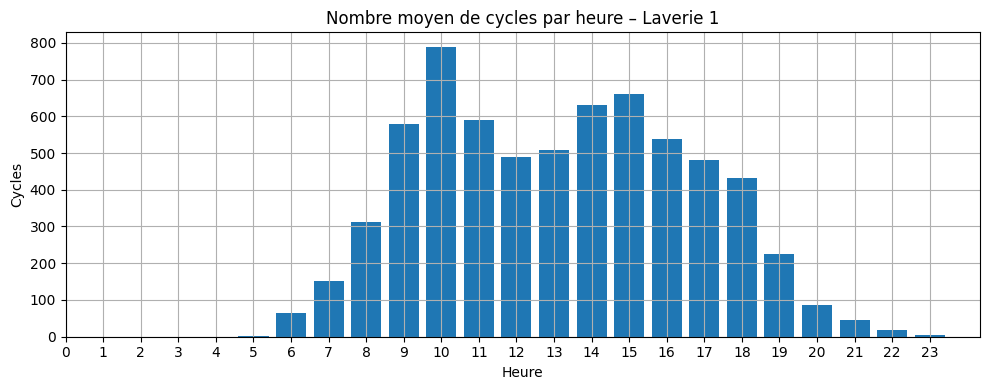

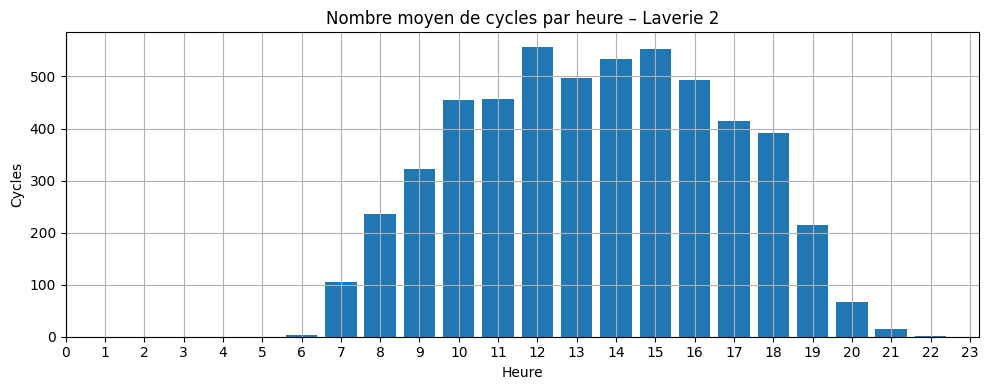

ValueError: List of boxplot statistics and `positions` values must have same the length

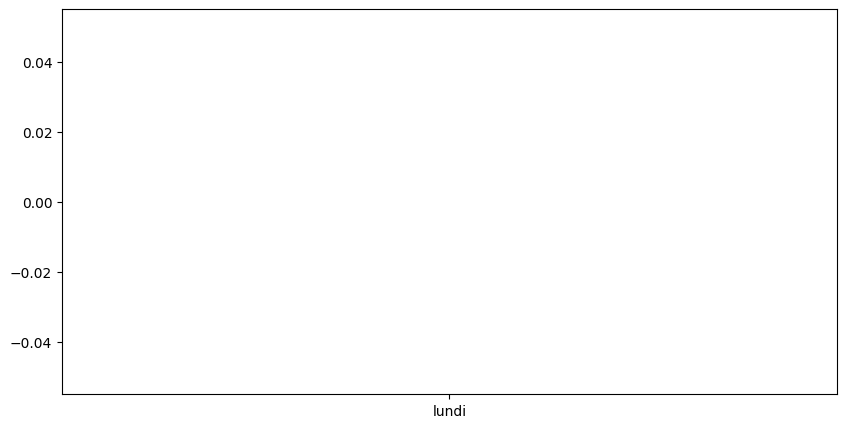

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- 1. Chargement ----------
paths = {
    "Laverie 1": "../data_cleaned/laverie1/transactions_transaction_cleaned.csv",
    "Laverie 2": "../data_cleaned/laverie2/transactions_transaction_cleaned.csv",
}

frames = []
for laverie, path in paths.items():
    df = pd.read_csv(path)
    dt_col = [c for c in df.columns if "date" in c.lower() or "heure" in c.lower()][0]
    df[dt_col] = pd.to_datetime(df[dt_col])
    df["laverie"]   = laverie
    df["hour"]      = df[dt_col].dt.hour
    df["weekday"]   = df[dt_col].dt.day_name(locale="fr_FR")   # ex. 'lundi'
    df["weekday_num"] = df[dt_col].dt.weekday                 # 0=lundi
    frames.append(df)

data = pd.concat(frames, ignore_index=True)

# ---------- 2. Moyenne par heure ----------
hourly = (
    data.groupby(["laverie", "hour"])
        .size()
        .reset_index(name="cycles")
)
print("\n=== Moyenne de cycles par heure ===")
print(hourly)

# ---------- 3. Histogrammes ----------
for lav in hourly["laverie"].unique():
    subset = hourly[hourly["laverie"] == lav]
    plt.figure(figsize=(10, 4))
    plt.bar(subset["hour"], subset["cycles"])
    plt.title(f"Nombre moyen de cycles par heure – {lav}")
    plt.xlabel("Heure")
    plt.ylabel("Cycles")
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ---------- 4. Heatmaps jour × heure ----------
# ordre des jours en français
jours_ordre = ["lundi", "mardi", "mercredi", "jeudi", "vendredi", "samedi", "dimanche"]
jours_affiche = ["Lun", "Mar", "Mer", "Jeu", "Ven", "Sam", "Dim"]

for lav in data["laverie"].unique():
    subset = data[data["laverie"] == lav]

    pivot = (
        subset.groupby(["weekday", "hour"])
              .size()
              .unstack(fill_value=0)
              .reindex(index=jours_ordre)      # maintenant les bons labels
    )

    plt.figure(figsize=(12, 5))
    sns.heatmap(pivot, cmap="YlGnBu", annot=True, fmt="d")
    plt.title(f"Carte de chaleur – Cycles par heure et jour ({lav})")
    plt.yticks(ticks=[i + 0.5 for i in range(7)], labels=jours_affiche, rotation=0)
    plt.xlabel("Heure")
    plt.ylabel("Jour")
    plt.tight_layout()
    plt.show()

# ---------- 5. Statistiques clés ----------
stats = (
    data.groupby("laverie")
        .agg(
            total_cycles=("hour", "size"),                # on compte les lignes
            heure_pic=("hour", lambda x: x.value_counts().idxmax()),
            jour_pic=("weekday", lambda x: x.value_counts().idxmax())
        )
        .reset_index()
)
print("\n=== Statistiques clés par laverie ===")
print(stats)
